In [ ]:
import pandas as pd
import numpy as np
d = pd.read_csv('/content/depression_data.csv')
d = d.dropna()
print(d)

                    Name  Age Marital Status    Education Level  \
0       Christine Barker   31        Married  Bachelor's Degree   
1       Jacqueline Lewis   55        Married        High School   
2         Shannon Church   78        Widowed    Master's Degree   
3         Charles Jordan   58       Divorced    Master's Degree   
4           Michael Rich   18         Single        High School   
...                  ...  ...            ...                ...   
339447      Dillon Gomez   65        Married        High School   
339448     Courtney Snow   40        Married                PhD   
339449       Jamie Mayer   39        Married    Master's Degree   
339450      Jason Vaughn   42        Married        High School   
339451  Richard Benjamin   78        Married   Associate Degree   

        Number of Children Smoking Status Physical Activity Level  \
0                        2     Non-smoker                  Active   
1                        1     Non-smoker               S

In [ ]:
d['Marital Status'] = d['Marital Status'].map({
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Widowed': 3
})

d['Smoking Status'] = d['Smoking Status'].map({
    'Non-smoker': 0,
    'Former': 1,
    'Current': 2
})

d['Physical Activity Level'] = d['Physical Activity Level'].map({
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
})

d['Alcohol Consumption'] = d['Alcohol Consumption'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

d['Dietary Habits'] = d['Dietary Habits'].map({
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
})

d['Sleep Patterns'] = d['Sleep Patterns'].map({
    'Poor': 0,
    'Fair': 1,
    'Good': 2
})

d['History of Mental Illness'] = d['History of Mental Illness'].map({'Yes': 1, 'No': 0})
d['History of Substance Abuse'] = d['History of Substance Abuse'].map({'Yes': 1, 'No': 0})
d['Family History of Depression'] = d['Family History of Depression'].map({'Yes': 1, 'No': 0})
d['Chronic Medical Conditions'] = d['Chronic Medical Conditions'].map({'Yes': 1, 'No': 0})

d['Employment Status'] = d['Employment Status'].replace({'Employed': 1, 'Unemployed': 0})

name_mapping = {
    'Christine Barker': 0,
    'Jacqueline Lewis': 1,
    'Shannon Church': 2,
    'Charles Jordan': 3,
    'Michael Rich': 4,
    'Sean Miller': 5,
    'Christina Brown': 6,
    'Matthew Jenkins': 7,
    'Gary Faulkner': 8,
    'Joseph Johnson': 9
}
d['Name'] = d['Name'].replace(name_mapping)
# Convert 'Education Level' to string type before using .str.lower()
d['Education Level'] = d['Education Level'].astype(str).str.lower().map({
    "bachelor's degree": 0,
    "high school": 1,
    "master's degree": 2,
    'associate degree': 3
})
print(d)

<ipython-input-2-cc17d843a530>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Employment Status'] = d['Employment Status'].replace({'Employed': 1, 'Unemployed': 0})


                    Name  Age  Marital Status  Education Level  \
0                      0   31               1              0.0   
1                      1   55               1              1.0   
2                      2   78               3              2.0   
3                      3   58               2              2.0   
4                      4   18               0              1.0   
...                  ...  ...             ...              ...   
339447      Dillon Gomez   65               1              1.0   
339448     Courtney Snow   40               1              NaN   
339449       Jamie Mayer   39               1              2.0   
339450      Jason Vaughn   42               1              1.0   
339451  Richard Benjamin   78               1              3.0   

        Number of Children  Smoking Status  Physical Activity Level  \
0                        2               0                        2   
1                        1               0                       

In [ ]:
y=d['Chronic Medical Conditions']
print(y)

0         1
1         1
2         0
3         0
4         1
         ..
339447    0
339448    0
339449    0
339450    0
339451    1
Name: Chronic Medical Conditions, Length: 339452, dtype: int64


In [ ]:
x=d.drop(['Chronic Medical Conditions'],axis=1)
print(x)

                    Name  Age  Marital Status  Education Level  \
0                      0   31               1              0.0   
1                      1   55               1              1.0   
2                      2   78               3              2.0   
3                      3   58               2              2.0   
4                      4   18               0              1.0   
...                  ...  ...             ...              ...   
339447      Dillon Gomez   65               1              1.0   
339448     Courtney Snow   40               1              NaN   
339449       Jamie Mayer   39               1              2.0   
339450      Jason Vaughn   42               1              1.0   
339451  Richard Benjamin   78               1              3.0   

        Number of Children  Smoking Status  Physical Activity Level  \
0                        2               0                        2   
1                        1               0                       

In [ ]:

features=d.drop(['Chronic Medical Conditions','Name'],axis=1)
print(features)

        Age  Marital Status  Education Level  Number of Children  \
0        31               1              0.0                   2   
1        55               1              1.0                   1   
2        78               3              2.0                   1   
3        58               2              2.0                   3   
4        18               0              1.0                   0   
...     ...             ...              ...                 ...   
339447   65               1              1.0                   0   
339448   40               1              NaN                   3   
339449   39               1              2.0                   0   
339450   42               1              1.0                   3   
339451   78               1              3.0                   0   

        Smoking Status  Physical Activity Level  Employment Status     Income  \
0                    0                        2                  0   26265.67   
1                    

In [ ]:
features

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,31,1,0.0,2,0,2,0,26265.67,1,1,1,1,0,1
1,55,1,1.0,1,0,0,1,42710.36,2,0,1,1,0,0
2,78,3,2.0,1,0,0,1,125332.79,0,0,2,0,0,1
3,58,2,2.0,3,0,1,0,9992.78,1,1,0,0,0,0
4,18,0,1.0,0,0,0,0,8595.08,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339447,65,1,1.0,0,0,1,1,30748.28,0,0,2,1,0,1
339448,40,1,NaN,3,0,0,0,26631.46,1,1,1,0,1,0
339449,39,1,2.0,0,1,0,1,150259.22,1,1,2,0,0,1
339450,42,1,1.0,3,0,2,1,23881.20,1,1,0,0,1,0


In [ ]:
features.isnull().sum()
features.replace(np.inf, -np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.4,random_state=20)

accuracy: 0.6697561447180801


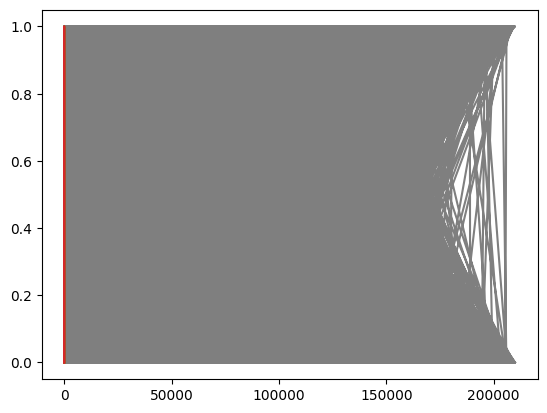

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
plt.plot(x_train,y_train)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[110570    481]
 [ 54177    280]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80    111051
           1       0.37      0.01      0.01     54457

    accuracy                           0.67    165508
   macro avg       0.52      0.50      0.41    165508
weighted avg       0.57      0.67      0.54    165508



In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)


accuracy: 0.6709705875244701


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[111051      0]
 [ 54457      0]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80    111051
           1       0.00      0.00      0.00     54457

    accuracy                           0.67    165508
   macro avg       0.34      0.50      0.40    165508
weighted avg       0.45      0.67      0.54    165508



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
plt.plot(x_train,y_train)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     31911
           1       0.00      0.00      0.00     15796

    accuracy                           0.67     47707
   macro avg       0.33      0.50      0.40     47707
weighted avg       0.45      0.67      0.54     47707



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.597857756723332


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# First, perform SMOTE oversampling on the entire dataset
smote = SMOTE(random_state=20) # Initialize SMOTE with random_state
features_resampled, y_resampled = smote.fit_resample(features, y)

# Then, split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=20)

In [ ]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()
#x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.5143717836073805


In [ ]:
from sklearn.linear_model import Perceptron
model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.4945085979666123


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[    0 16109]
 [    0 15759]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16109
           1       0.49      1.00      0.66     15759

    accuracy                           0.49     31868
   macro avg       0.25      0.50      0.33     31868
weighted avg       0.24      0.49      0.33     31868



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.6103928705911886


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10043  6066]
 [ 6350  9409]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.62      0.62     16109
           1       0.61      0.60      0.60     15759

    accuracy                           0.61     31868
   macro avg       0.61      0.61      0.61     31868
weighted avg       0.61      0.61      0.61     31868



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.6648318709466456


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[24398     0]
 [12300     0]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     24398
           1       0.00      0.00      0.00     12300

    accuracy                           0.66     36698
   macro avg       0.33      0.50      0.40     36698
weighted avg       0.44      0.66      0.53     36698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.6012044253092812


In [ ]:
X=features


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=662c01beca40d127d0234d3c3c5e7f87ed95ad574039b3361b4bc71e9b73d1a3
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm
Stopping search: maximum iterations reached --> 10
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     83167
           1       0.65      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.66      0.50      0.40    124131
weighted avg       0.66      0.67      0.54    124131



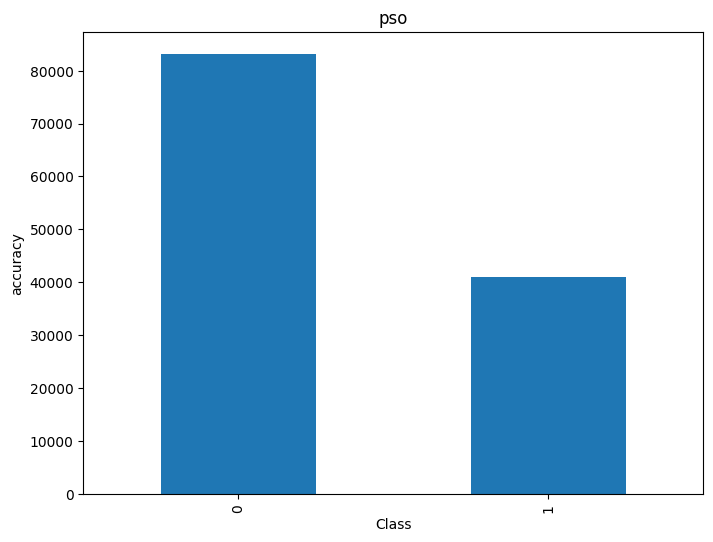

In [ ]:
import pandas as pd
!pip install pyswarm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pyswarm import pso
import matplotlib.pyplot as plt
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
X = features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
def objective_function(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return 1 - score
lb = [10, 5]
ub = [200, 20]

# Run PSO
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)
best_n_estimators, best_max_depth = int(best_params[0]), int(best_params[1])
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))
report_df = pd.DataFrame(report).transpose()

# Plot the support for each class
plt.figure(figsize=(8, 6))
report_df['support'][:-3].plot(kind='bar')
plt.title('pso')
plt.xlabel('Class')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# Import necessary libraries
!pip install --upgrade sklearn-genetic-opt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Updated imports for sklearn-genetic-opt
# Updated imports for sklearn-genetic-opt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical  # Removed Real import
# Real space is no longer part of the core library and might be available through a custom extension or configuration
from sklearn_genetic.plots import plot_fitness_evolution

# Assuming you have a dataset 'X' (features) and 'y' (labels) defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest Model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': Integer(50, 300),          # Number of trees (using Integer space)
    'max_depth': Integer(5, 50),               # Depth of trees (using Integer space)
    'min_samples_split': Integer(2, 10),       # Minimum samples for split (using Integer space)
    'min_samples_leaf': Integer(1, 5),         # Minimum samples at a leaf (using Integer space)
    'max_features': Categorical(['sqrt', 'log2', None])  # Categorical space for max_features
}

# Setting up the Genetic Algorithm optimization
ga_search = GASearchCV(
    estimator=model,
    cv=3,
    param_grid=param_grid,
    n_jobs=-1,
    scoring="accuracy",
    population_size=30,       # Larger population size
    generations=15,           # More generations for a thorough search
    crossover_probability=0.8,
    mutation_probability=0.1,
    verbose=True,
    keep_top_k=5,             # Keep the best 5 solutions from each generation
    elitism=True              # Preserve the best individuals in the population
)

# Train the model with GA optimization
ga_search.fit(X_train_scaled, y_train)

# Best parameters found by GA
print("\nBest Parameters found by Genetic Algorithm:")
print(ga_search.best_params_)

# Evaluate the best model
best_model = ga_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Generate Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(pd.DataFrame(report).transpose())

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot the Accuracy vs Generations (GA Convergence Plot)
plot_fitness_evolution(ga_search)
plt.title("GA Convergence Plot")
plt.grid()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define the objective function for DE
def objective_function(params, X_train, y_train, X_val, y_val):
    C, gamma = params
    model = SVC(C=C, gamma=gamma, kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return 1 - accuracy_score(y_val, y_pred)  # Minimize 1 - accuracy

# Step 5: Implement the Differential Evolution Algorithm
class DifferentialEvolution:
    def __init__(self, population_size, dimensions, bounds, mutation_factor, crossover_rate, generations, X_train, y_train, X_val, y_val):
        self.population_size = population_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.mutation_factor = mutation_factor
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.X_train, self.y_train, self.X_val, self.y_val = X_train, y_train, X_val, y_val
        self.population = np.random.uniform(bounds[0], bounds[1], (population_size, dimensions))
        self.fitness = np.array([objective_function(ind, X_train, y_train, X_val, y_val) for ind in self.population])
        self.best_individual = self.population[np.argmin(self.fitness)]
        self.best_fitness = min(self.fitness)
        self.history = []

    def mutate(self, target_idx):
        indices = [i for i in range(self.population_size) if i != target_idx]
        a, b, c = self.population[np.random.choice(indices, 3, replace=False)]
        mutant = np.clip(a + self.mutation_factor * (b - c), self.bounds[0], self.bounds[1])
        return mutant

    def crossover(self, target, mutant):
        crossover_mask = np.random.rand(self.dimensions) < self.crossover_rate
        trial = np.where(crossover_mask, mutant, target)
        return trial

    def evolve(self):
        for gen in range(self.generations):
            new_population = np.copy(self.population)
            for i in range(self.population_size):
                target = self.population[i]
                mutant = self.mutate(i)
                trial = self.crossover(target, mutant)
                trial_fitness = objective_function(trial, self.X_train, self.y_train, self.X_val, self.y_val)
                if trial_fitness < self.fitness[i]:
                    new_population[i] = trial
                    self.fitness[i] = trial_fitness
                    if trial_fitness < self.best_fitness:
                        self.best_individual = trial
                        self.best_fitness = trial_fitness
            self.population = new_population
            self.history.append(1 - self.best_fitness)
            print(f"Generation {gen+1}/{self.generations}, Best Accuracy: {1 - self.best_fitness:.4f}")

    def plot_convergence(self):
        plt.plot(self.history, label="Best Fitness (Accuracy)")
        plt.xlabel("Generation")
        plt.ylabel("Accuracy")
        plt.title("DE Convergence on SVM Hyperparameter Optimization")
        plt.legend()
        plt.grid()
        plt.show()

# Step 6: Hyperparameters for DE
population_size = 20
dimensions = 2
bounds = [(0.1, 10), (0.001, 1)]  # Bounds for C and gamma
mutation_factor = 0.8
crossover_rate = 0.7
generations = 50

# Step 7: Run Differential Evolution
de = DifferentialEvolution(population_size, dimensions, bounds, mutation_factor, crossover_rate, generations, X_train, y_train, X_val, y_val)
de.evolve()

# Step 8: Evaluate the best model found
best_C, best_gamma = de.best_individual
svm_model = SVC(C=best_C, gamma=best_gamma, kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print("\nBest Hyperparameters:")
print(f"C: {best_C:.4f}, gamma: {best_gamma:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Step 9: Plot Convergence
de.plot_convergence()


Initial Guess: [-1.64952563  0.01691341], Initial Fitness: 18.68
BFGS Result: [-1.98991224e+00 -8.01311582e-09], Fitness: 3.98, Iterations: 5
Optimization Accuracy: 78.69%
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     55508
           1       0.00      0.00      0.00     27246

    accuracy                           0.67     82754
   macro avg       0.34      0.50      0.40     82754
weighted avg       0.45      0.67      0.54     82754



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76     55508
           1       0.35      0.14      0.20     27246

    accuracy                           0.63     82754
   macro avg       0.51      0.50      0.48     82754
weighted avg       0.57      0.63      0.57     82754



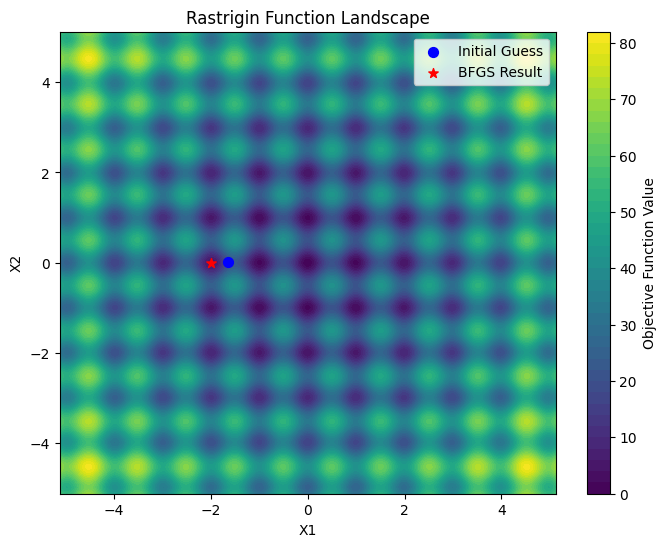

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Ensure your dataset (X, y) is loaded here
# Example:
# X = pd.read_csv("features.csv")
# y = pd.read_csv("labels.csv")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define the Rastrigin function and optimization methods
def objective_function(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def quasi_newton_bfgs(x0, tol=1e-6, max_iter=100):
    result = minimize(objective_function, x0, method='BFGS', tol=tol, options={'maxiter': max_iter})
    return result.x, result.fun, result.nit, result

# Step 5: Optimize the Rastrigin function
dimensions = 2
initial_guess = np.random.uniform(-5.12, 5.12, dimensions)
bfgs_x, bfgs_fitness, iterations, result = quasi_newton_bfgs(initial_guess)
initial_fitness = objective_function(initial_guess)
accuracy = 1 - (bfgs_fitness / initial_fitness)

# Print optimization results
print(f"Initial Guess: {initial_guess}, Initial Fitness: {initial_fitness:.2f}")
print(f"BFGS Result: {bfgs_x}, Fitness: {bfgs_fitness:.2f}, Iterations: {iterations}")
print(f"Optimization Accuracy: {accuracy * 100:.2f}%")

# Step 6: Train Logistic Regression with Hyperparameter Tuning
logreg = LogisticRegression(random_state=42)

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# GridSearch for best parameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearch
best_logreg = grid_search.best_estimator_

# Predict using the best model
y_pred = best_logreg.predict(X_test_scaled)

# Step 7: Generate Classification Report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Train a Random Forest model as an alternative
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Step 8: Plot the Rastrigin Function and Optimization Steps
def plot_rastrigin():
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = objective_function([X, Y])
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Objective Function Value')
    plt.title("Rastrigin Function Landscape")
    plt.xlabel("X1")
    plt.ylabel("X2")

plot_rastrigin()
plt.scatter(*initial_guess, color='blue', s=50, label='Initial Guess')
plt.scatter(*bfgs_x, color='red', s=50, marker='*', label='BFGS Result')
plt.legend()
plt.show()


Encoding column: Name

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     27524

    accuracy                           1.00     27524
   macro avg       1.00      1.00      1.00     27524
weighted avg       1.00      1.00      1.00     27524

Test Accuracy: 100.00%


<ipython-input-17-de55d6f48456>:95: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50, label='Test Data')


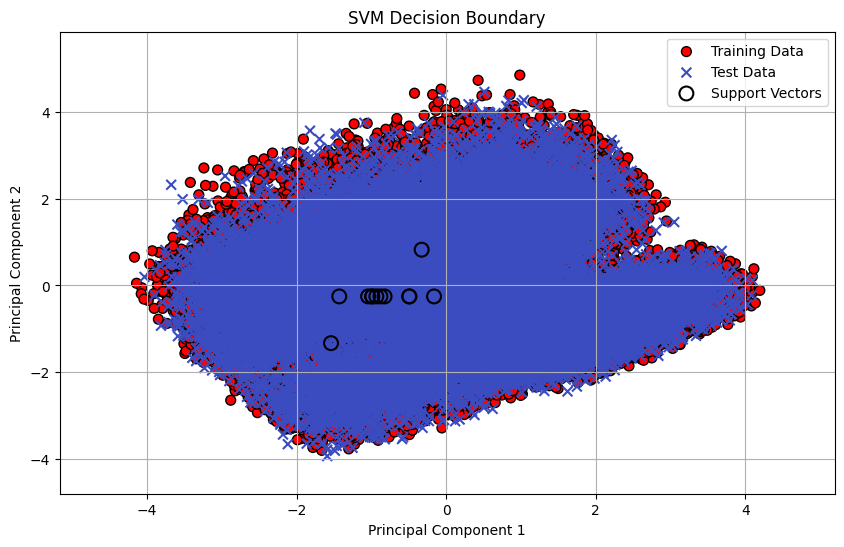

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
!pip install pandas numpy matplotlib scikit-learn

# Step 4: Preprocess the data
# Drop any columns that are not useful (e.g., 'Name' if it exists)
# Check if 'Name' exists in columns before dropping
# Use 'x' or 'd' instead of 'data'
if 'Name' in d.columns:
    d.drop(columns=['Name'], inplace=True)

# Check for non-numeric columns and apply Label Encoding if necessary
# Use 'x' instead of 'data'
# Check for non-numeric columns and apply Label Encoding if necessary
# Use 'x' instead of 'data'
for column in x.select_dtypes(include=['object']).columns:  # Changed 'data' to 'x'
    print(f"Encoding column: {column}")
    # Check if column contains mixed types
    if x[column].apply(type).nunique() > 1:
        # If mixed types, convert all to strings before encoding
        x[column] = x[column].astype(str)  # Convert all values to string
    d[column] = LabelEncoder().fit_transform(x[column])  # Changed 'data' to 'x'  # Changed 'data' to 'x'

# Check for missing values and fill them (optional)
# Use 'x' or 'd' instead of 'data'
d.fillna(d.mean(numeric_only=True), inplace=True)  # Changed 'data' to 'd'


# Step 5: Separate features and target
# Assuming the last column is the target variable
# Use 'd' instead of 'data'
X = d.iloc[:, :-1].values  # Features (all columns except the last one)  # Changed 'data' to 'd'
y = d.iloc[:, -1].values   # Target (last column)  # Changed 'data' to 'd'

# ... (rest of the code remains the same)

# Convert target labels to be -1 and 1 if not already binary
y = np.where(y == 0, -1, 1)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

# Step 9: Make predictions
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Visualization (using PCA if features > 2)
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X_train_scaled)
    X_vis_test = pca.transform(X_test_scaled)
else:
    X_vis = X_train_scaled
    X_vis_test = X_test_scaled

# Plot decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Adjust decision function input if PCA was used
if X.shape[1] > 2:
    Z = svm.decision_function(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
else:
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

# Step 12: Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['#FFAAAA', '#AAAAFF'])
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=1)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=50, label='Training Data')
plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='x', s=50, label='Test Data')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolor='k', linewidth=1.5, label='Support Vectors')
plt.title("SVM Decision Boundary")
plt.xlabel("Principal Component 1" if X.shape[1] > 2 else "Feature 1")
plt.ylabel("Principal Component 2" if X.shape[1] > 2 else "Feature 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Augmented Lagrangian Method Optimization
def objective_function(x):
    return x[0]**2 + x[1]**2

def constraint(x):
    return x[0] + x[1] - 1

def augmented_lagrangian(x, mu, lambd):
    penalty_term = mu * max(0, constraint(x))**2
    lagrange_term = lambd * constraint(x)
    return objective_function(x) + penalty_term + lagrange_term

# Initialization
mu_initial = 1.0
lambda_initial = 0.0
tolerance = 1e-5
max_iterations = 50
x0 = np.array([0.5, 0.5])
history = []
mu = mu_initial
lambd = lambda_initial
x = x0

for i in range(max_iterations):
    result = minimize(augmented_lagrangian, x, args=(mu, lambd), method='BFGS', tol=tolerance)
    x = result.x
    constraint_violation = abs(constraint(x))
    history.append(objective_function(x))
    if constraint_violation < tolerance:
        break
    lambd += 2 * mu * constraint(x)
    mu *= 1.5

initial_fitness = objective_function(x0)
final_fitness = objective_function(x)
accuracy_optimization = 1 - (final_fitness / initial_fitness)
print(f"\nInitial Guess: {x0}, Initial Fitness: {initial_fitness}")
print(f"Optimal Solution: {x}, Final Fitness: {final_fitness}")
print(f"Constraint Violation: {constraint_violation}")
print(f"Accuracy from optimization: {accuracy_optimization * 100:.2f}%")

# Plotting the Convergence
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history, label='Objective Function Value')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Augmented Lagrangian Method")
plt.legend()
plt.grid()

# If the dataset has exactly two features, visualize the SVM decision boundary
if X_train.shape[1] == 2:
    def plot_decision_boundary(X, y, model):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(1, 2, 2)
        plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['#FFAAAA', '#AAAAFF'])
        plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=1)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50)
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                    facecolors='none', edgecolor='k', linewidth=1.5, label='Support Vectors')
        plt.title("SVM Decision Boundary with SMO")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.grid()

    plot_decision_boundary(X_train, y_train, svm)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Load your dataset
df = pd.read_csv('/content/depression_data.csv')

# Step 2: Check for non-numeric columns
print("Data types before conversion:\n", df.dtypes)

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Step 3: Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1].values  # Target (last column)

# Convert target labels to binary (-1, 1) if necessary
y = np.where(y == 0, -1, 1)

# Check if target 'y' has more than one class
unique_classes = np.unique(y)
if len(unique_classes) <= 1:
    raise ValueError(f"Target variable 'y' needs at least 2 classes, but got {len(unique_classes)} class(es).")

# Step 4: Convert X to a NumPy array
X = X.values

# Step 5: Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution in the training set
print("Class distribution in y_train before SMOTE:", np.bincount(y_train + 1))  # Adjusted for [-1, 1] labels

# Step 6: Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution in y_train after SMOTE:", np.bincount(y_train + 1))

# Ensure y_train has more than one class
unique_classes_train = np.unique(y_train)
if len(unique_classes_train) <= 1:
    raise ValueError(f"y_train needs at least 2 classes, but got {len(unique_classes_train)} class(es).")

# Step 7: Train the SVM model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = svc.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize the decision boundary using only the first two features
def plot_decision_boundary(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of SVM')
    plt.show()

# Visualize decision boundary (using only the first two features for simplicity)
X_train_vis = X_train[:, :2]
y_train_vis = y_train

svc_vis = SVC(kernel='linear')
svc_vis.fit(X_train_vis, y_train_vis)

plot_decision_boundary(X_train_vis, y_train_vis, svc_vis)


Data types before conversion:
 Name                             object
Age                               int64
Marital Status                   object
Education Level                  object
Number of Children                int64
Smoking Status                   object
Physical Activity Level          object
Employment Status                object
Income                          float64
Alcohol Consumption              object
Dietary Habits                   object
Sleep Patterns                   object
History of Mental Illness        object
History of Substance Abuse       object
Family History of Depression     object
Chronic Medical Conditions       object
dtype: object
Class distribution in y_train before SMOTE: [194292      0  95345]
Class distribution in y_train after SMOTE: [194292      0 194292]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Import SMOTE

# ... (rest of your code remains the same)

# --- Check if y_train has more than one class ---
unique_classes = np.unique(y_train)

# --- Apply SMOTE only if there is class imbalance ---
# Check if y_train has more than one class and if one class is significantly under-represented
if len(unique_classes) > 1 and np.min(np.bincount(y_train)) / len(y_train) < 0.1:  # Example threshold of 10%
    print("Applying SMOTE to balance the dataset...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Dataset balanced using SMOTE.")
elif len(unique_classes) <= 1:  # Raise error if only one class is present
    raise ValueError(
        f"y_train has only {len(unique_classes)} unique class(es). It needs at least 2 for classification."
    )

# ... (rest of your code remains the same)

# Step 5: Train the SVM model
svc = SVC(kernel='linear', class_weight='balanced')  # Added class_weight='balanced' to handle imbalance
svc.fit(X_train, y_train)

# ... (rest of the code remains the same)

# Step 6: Make predictions and evaluate the model
y_pred = svc.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the decision boundary (using only the first two features for simplicity)
X_train_vis = X_train[:, :2]  # Use only the first two features for visualization
y_train_vis = y_train

# Retrain the model with only two features for visualization purposes
svc_vis = SVC(kernel='linear', class_weight='balanced')
svc_vis.fit(X_train_vis, y_train_vis)

def plot_decision_boundary(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary using SVC with Dual Coordinate Descent")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting the decision boundary
plot_decision_boundary(X_train_vis, y_train_vis, svc_vis)


ValueError: y_train has only 1 unique class(es). It needs at least 2 for classification.

First 5 rows of the dataset:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


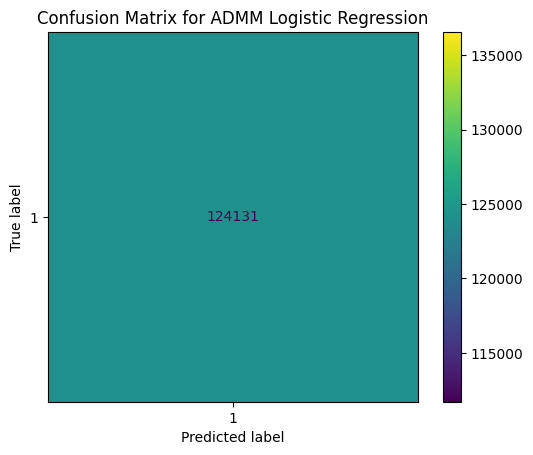

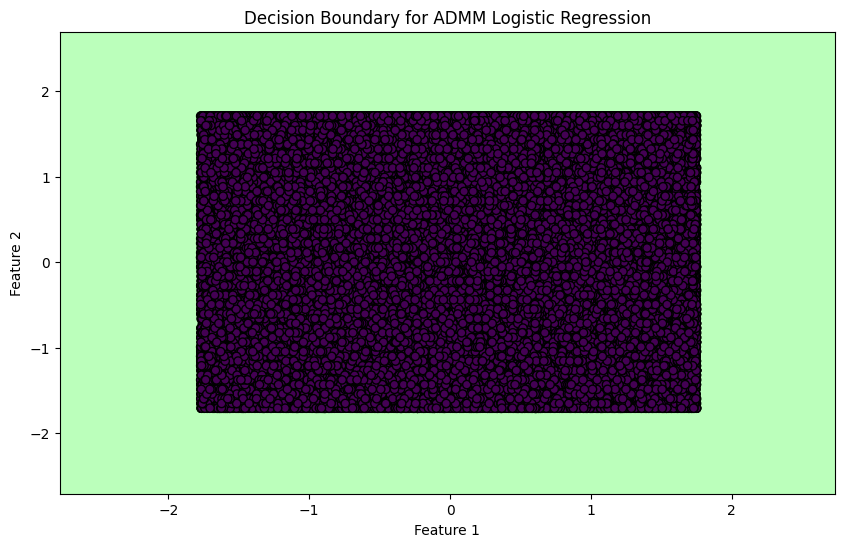

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# Step 1: Load the dataset from the CSV file
df = pd.read_csv('depression_data.csv')

# Step 2: Inspect the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1].values  # Target (last column)

# Convert target labels to binary (-1, 1) if necessary
y = np.where(y == 0, -1, 1)

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Convert X to a NumPy array
X = X.values

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term to the dataset
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# ADMM Logistic Regression Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_loss(w, X, y):
    z = X @ w
    return np.mean(np.log(1 + np.exp(-y * z)))

def admm_logistic(X, y, rho=1.0, alpha=1.0, max_iter=100):
    m, n = X.shape
    w = np.zeros(n)
    z = np.zeros(n)
    u = np.zeros(n)
    for _ in range(max_iter):
        # Update w
        w = np.linalg.solve(X.T @ X + rho * np.eye(n), X.T @ y + rho * (z - u))
        # Update z
        z = np.maximum(0, w + u - alpha) - np.maximum(0, -w - u - alpha)
        # Update u
        u = u + w - z
    return w

# Train ADMM Logistic Regression
w_admm = admm_logistic(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred_prob = sigmoid(X_test @ w_admm)
y_pred = np.where(y_pred_prob >= 0.5, 1, -1)

# Step 7: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix for ADMM Logistic Regression")
plt.show()

# Step 8: Visualize the decision boundary (using only the first two features)
def plot_decision_boundary(X, y, w):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = sigmoid(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w[:3])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary for ADMM Logistic Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize decision boundary using only first two features
plot_decision_boundary(X_test[:, :3], y_test, w_admm)


First 5 rows of the dataset:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2     

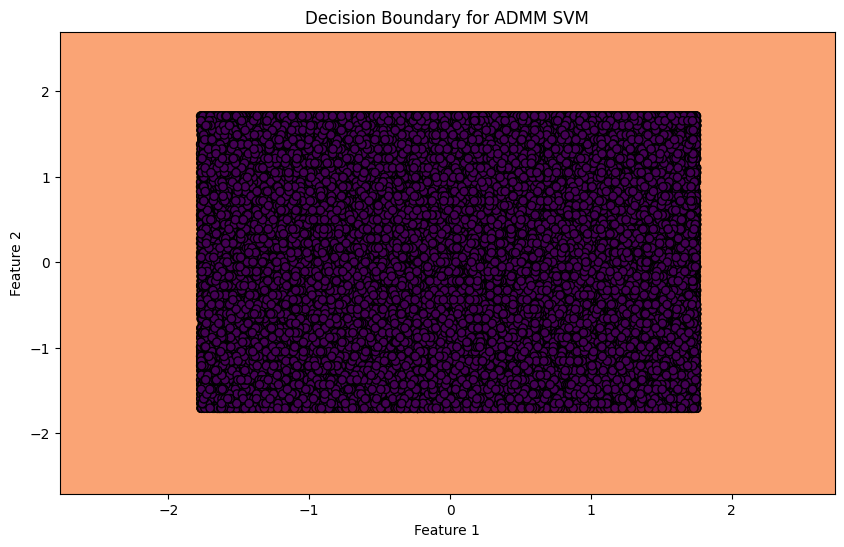

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Load the dataset from the CSV file
df = pd.read_csv('depression_data.csv')

# Step 2: Inspect the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1].values  # Target (last column)

# Convert target labels to binary (-1, 1) if necessary
y = np.where(y == 0, -1, 1)

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Convert X to a NumPy array
X = X.values

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ADMM SVM Parameters
alpha = 0.1
rho = 1.0
n_iterations = 1000
lr = 0.01

# Initialize variables
w = np.zeros(X_train.shape[1])
b = 0
z = np.zeros(X_train.shape[1])
u = np.zeros(X_train.shape[1])

# ADMM SVM Algorithm
def admm_svm(X, y, w, b, z, u, lr, alpha, rho, n_iterations):
    for i in range(n_iterations):
        margin = y * (X.dot(w) + b)
        loss_grad_w = -np.mean((y[:, np.newaxis] * X) * (margin < 1)[:, np.newaxis], axis=0) + rho * (w - z + u)
        loss_grad_b = -np.mean(y * (margin < 1))

        w -= lr * loss_grad_w
        b -= lr * loss_grad_b
        z = np.sign(w + u) * np.maximum(0, np.abs(w + u) - alpha / rho)
        u += w - z

    return w, b

# Train the ADMM SVM model
w, b = admm_svm(X_train, y_train, w, b, z, u, lr, alpha, rho, n_iterations)

def predict(X, w, b): # Added w and b as arguments
    return np.sign(X.dot(w) + b)

# ... (rest of the code remains the same)

# Train the ADMM SVM model
w, b = admm_svm(X_train, y_train, w, b, z, u, lr, alpha, rho, n_iterations)

# Pass w and b to predict
y_pred = predict(X_test, w, b) # Pass w and b to predict
# Print Classificatioden Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ... (rest of the code remains the same)

# Define plot_decision_boundary to accept 4 arguments (X, y, w, b)
def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Use w and b for prediction, but only with the first two features of w
    Z = predict(np.c_[xx.ravel(), yy.ravel()], w[:2], b)  # Pass w[:2] to predict
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary for ADMM SVM')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Update the predict function to accept w and b as arguments
def predict(X, w, b):
    return np.sign(X.dot(w) + b)

# ... (rest of the code remains the same)

# Visualize decision boundary using only first two features from the test set
plot_decision_boundary(X_test[:, :2], y_test, w, b)

First 5 rows of the dataset:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2     

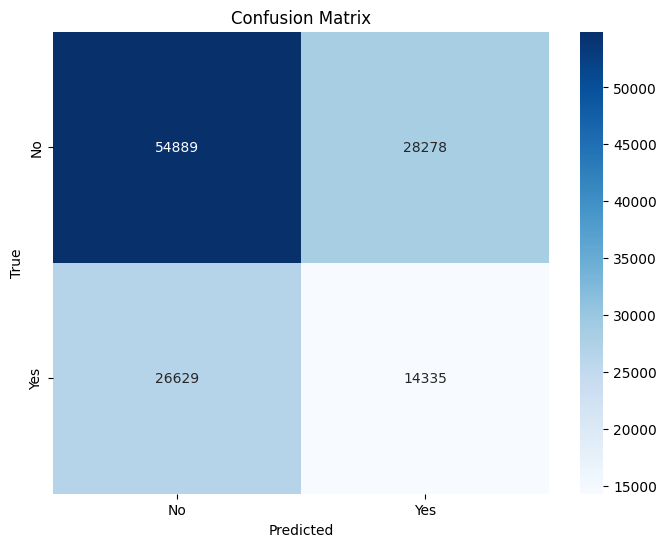

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv('/content/depression_data.csv')

# Step 2: Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Step 3: Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (last column)

# Step 4: Convert categorical features to numerical if necessary
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = clf.predict(X_test)

# Step 8: Evaluate the model
target_names = label_encoder.classes_ if 'label_encoder' in locals() else np.unique(y)
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


First 5 rows of the dataset:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Optimized Classification Report:
               precision    recall  f1-score   support

          No       0.67      1.00      0.80     83167
         Yes       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131



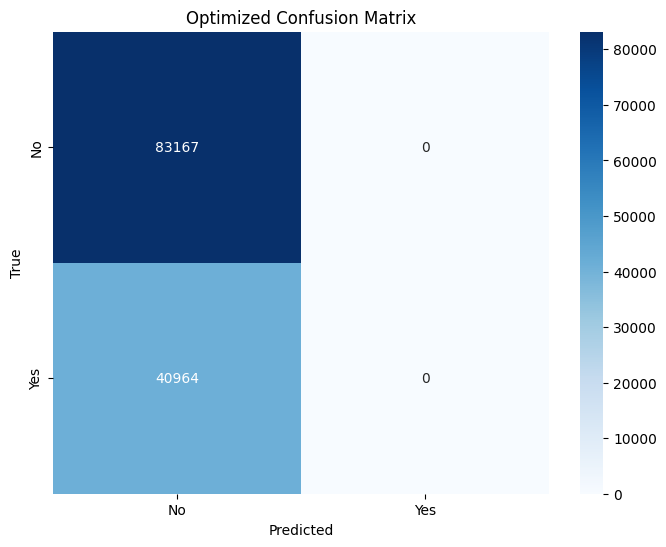

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import dual_annealing

# Step 1: Load the dataset
df = pd.read_csv('/content/depression_data.csv')

# Step 2: Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Step 3: Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (last column)

# Step 4: Convert categorical features to numerical if necessary
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Define the objective function for Simulated Annealing
def objective_function(params):
    max_depth = int(params[0])
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # We negate accuracy because we want to maximize it

# Step 7: Apply Simulated Annealing (dual_annealing) to find the optimal max_depth
bounds = [(1, 20)]  # Bounds for max_depth
result = dual_annealing(objective_function, bounds)
optimal_max_depth = int(result.x[0])
print("\nOptimal max_depth found by Simulated Annealing:", optimal_max_depth)

# Step 8: Train the optimized Decision Tree Classifier
clf_optimized = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
clf_optimized.fit(X_train, y_train)
y_pred_optimized = clf_optimized.predict(X_test)

# Step 9: Evaluate the optimized model
target_names = label_encoder.classes_ if 'label_encoder' in locals() else np.unique(y)
report_optimized = classification_report(y_test, y_pred_optimized, target_names=target_names)
print("\nOptimized Classification Report:\n", report_optimized)

# Step 10: Confusion Matrix for the optimized model
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Optimized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
#simulated anolog

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          No       0.67      1.00      0.80     83167
         Yes       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131



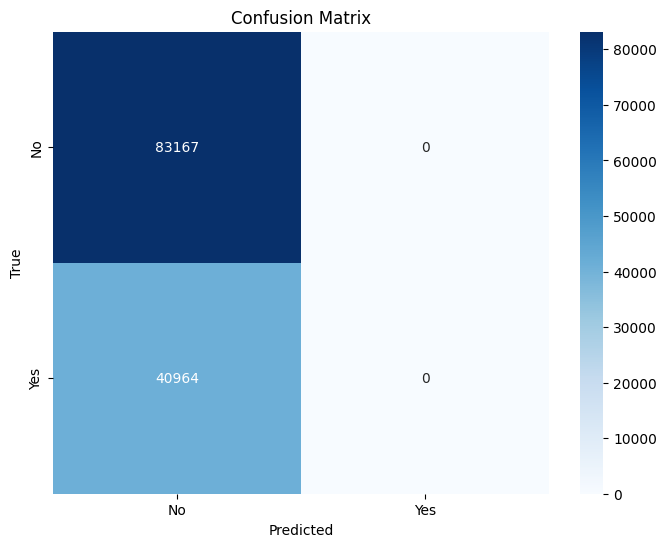

KeyboardInterrupt: 

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Step 1: Load the dataset  (This step was missing)
df = pd.read_csv('/content/depression_data.csv')

# Step 2: Assuming the last column is the target variable and the rest are features (This step was missing)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (last column)

# Step 4: Convert categorical features to numerical if necessary
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Define optimal hyperparameters
optimal_alpha = 0.001
optimal_learning_rate = 0.01

# Step 7: Function to get score for a given number of iterations
def get_score_for_iteration(iteration):
    clf_temp = SGDClassifier(loss='log_loss', alpha=optimal_alpha, learning_rate='constant', eta0=optimal_learning_rate, random_state=42, max_iter=iteration, tol=None)
    clf_temp.fit(X_train, y_train)
    y_pred_temp = clf_temp.predict(X_test)
    score = accuracy_score(y_test, y_pred_temp)
    return score

# Step 8: Train the SGD Classifier with the optimized parameters
clf_optimized = SGDClassifier(loss='log_loss', alpha=optimal_alpha, learning_rate='constant', eta0=optimal_learning_rate, random_state=42, max_iter=1000, tol=1e-3)
clf_optimized.fit(X_train, y_train)
y_pred_optimized = clf_optimized.predict(X_test)

# Step 9: Print the classification report
target_names = label_encoder.classes_ if 'label_encoder' in locals() else np.unique(y)
report = classification_report(y_test, y_pred_optimized, target_names=target_names)
print("Classification Report:\n", report)

# Step 10: Confusion Matrix for the optimized model
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 11: Track the SGD Convergence over iterations
sgd_scores = []
iterations = np.linspace(1, 500, 500, dtype=int)
for iteration in iterations:
    score = get_score_for_iteration(iteration)
    sgd_scores.append(score)

# Step 12: Plot the SGD Convergence Curve
plt.figure(figsize=(10,6))
plt.plot(iterations, sgd_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best individual: [0.5404041864157556, 0.2628082429553602, 0.2127112999549102, 0.2708127886250128, 0.22840821812538187, 0.2868408636153211, 0.8856588497576812, 1.1396225913307474, 0.3720447188392501, 0.3632242820666596, 0.15461956862485368, -0.3310548404705071, 0.47427785803855266, 1.1811855277555312, 0.40304339883731255]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80     83167
           1       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131

Accuracy: 0.6699937968758811


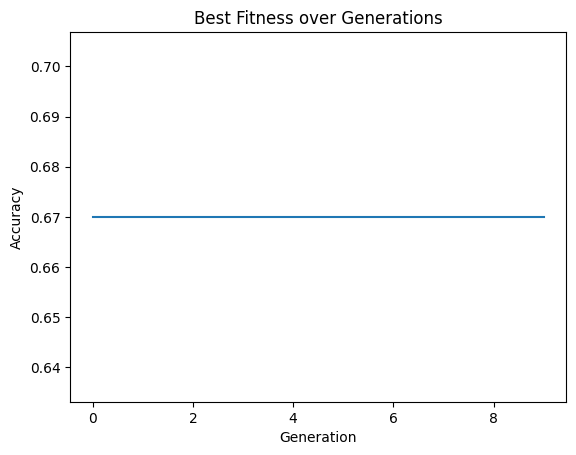

In [ ]:
!pip install deap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools

# Step 4: Convert categorical features to numerical if necessary
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Set up the Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)

# Step 8: DEAP setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizing fitness
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=X_train.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_classifier(individual):
    classifier.coef_ = np.array([individual])  # Set the individual weights as coefficients
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions),

toolbox.register("evaluate", eval_classifier)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Step 9: Initialize population and parameters
population = toolbox.population(n=50)
NGEN = 10  # Number of generations
best_fitnesses = []  # To store the best fitness per generation

# Step 10: Run the Genetic Algorithm
for gen in range(NGEN):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.rand() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Apply mutation
    for mutant in offspring:
        if np.random.rand() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate fitness of offspring
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population with offspring
    population[:] = offspring
    fits = [ind.fitness.values[0] for ind in population]
    best_fitnesses.append(max(fits))

# Step 11: Get the best individual and evaluate
best_idx = np.argmax(fits)
best_ind = population[best_idx]
classifier.coef_ = np.array([best_ind])
classifier.fit(X_train, y_train)

# Step 12: Predictions and evaluation
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Step 13: Output results
print("Best individual:", best_ind)
print("Classification Report:\n", report)
print("Accuracy:", accuracy)

# Step 14: Plot the fitness over generations
plt.plot(range(NGEN), best_fitnesses)
plt.title('Best Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
!pip install scikit-optimize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skopt import gp_minimize
from skopt.space import Real, Integer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Step 4: Handle categorical features
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Define the objective function for Bayesian Optimization
def objective(params):
    C, gamma = params
    clf = SVC(C=C, gamma=gamma, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Minimize the negative accuracy

# Step 8: Define the parameter space for optimization
space = [Real(1e-6, 1e+6, name='C'),
         Real(1e-6, 1e+1, name='gamma')]

# Step 9: Run Bayesian Optimization
res = gp_minimize(objective, space, n_calls=30, random_state=42)

# Step 10: Extract the best hyperparameters
best_C, best_gamma = res.x
print("Best C:", best_C)
print("Best gamma:", best_gamma)

# Step 11: Train the best model
best_model = SVC(C=best_C, gamma=best_gamma, random_state=42)
best_model.fit(X_train, y_train)

# Step 12: Evaluate the model
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Step 13: Print classification report and accuracy
print("Classification Report:\n", report)
print("Accuracy:", accuracy)

# Step 14: Plot convergence of Bayesian Optimization
plt.plot(res.func_vals)
plt.title('Convergence of Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Negative Accuracy')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load your dataset (Ensure 'df' is defined, for example, using pd.read_csv)
# df = pd.read_csv('your_dataset.csv')

# Step 2: Preprocessing - Assume the last column is the target
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (last column)

# Step 3: Handle categorical features if necessary
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Step 8: Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Step 9: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Import necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Step 1: Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/depression_data.csv')

# Step 2: Preprocessing - Assume the last column is the target
X = df.iloc[:, :-1]  # Features (all columns except the last one) # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (last column)

# Step 3: Handle categorical features if necessary
label_encoder = LabelEncoder()

# Encode any categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = label_encoder.fit_transform(y)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 7: Train the SVM model using the best parameters
best_model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = best_model.predict(X_test)

# Step 9: Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Step 10: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 12: Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Step 13: Plotting Precision, Recall, and F1 Score
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.show

KeyboardInterrupt: 